# **Import Dependencies**

In [ ]:
import numpy as np    
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import plotly as py
import cufflinks as cf
import tensorflow
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Dataset**

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Research Work/Pathao Implementation/Dataset/Pathao English.xlsx')

In [ ]:
df.head()

,Sentiment,Class,Sentiment.1,Class.1
0,"Nice step in that ""reserve"" is now available f...",Positive,"""রিজার্ভ"" এর দুর্দান্ত পদক্ষেপ এখন সমস্ত রাইড ...",সত্য
1,The app is good at showing the data user the d...,Positive,অ্যাপ্লিকেশনটি ডেটা ব্যবহারকারীকে ড্রাইভারের দ...,সত্য
2,Been using the app for the past 4+ years with ...,Positive,কোনও সমস্যা ছাড়াই গত 4+ বছর ধরে অ্যাপটি ব্যবহ...,সত্য
3,"After a day or two, app sent a notification fo...",Positive,"এক বা দু'দিন পরে, অ্যাপটি উবার ইটসের জন্য একটি...",সত্য
4,The app is very good for price comparison to o...,Positive,অ্যাপ্লিকেশনটি অন্যান্য সংস্থাগুলির সাথে দামের...,সত্য


In [ ]:
df=df.drop(["Sentiment.1","Class.1"],axis=1)

In [ ]:
df.head()

,Sentiment,Class
0,"Nice step in that ""reserve"" is now available f...",Positive
1,The app is good at showing the data user the d...,Positive
2,Been using the app for the past 4+ years with ...,Positive
3,"After a day or two, app sent a notification fo...",Positive
4,The app is very good for price comparison to o...,Positive


In [ ]:
df.shape

(1200, 2)

# **Check Null Value**

In [ ]:
df.isnull().sum()

Sentiment    1
Class        1
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df["Class"].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [ ]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.Class =='Negative']),
      "\nTotal Neutral :",len(df[df.Class =='Neutral']),
      "\nTotal Positive :",len(df[df.Class=='Positive']))

Total Comment: 1199 
Total Negative : 400 
Total Neutral : 399 
Total Positive : 400


In [ ]:
df['Class'].value_counts()

Positive    400
Negative    400
Neutral     399
Name: Class, dtype: int64

# **Dataset Distribution**

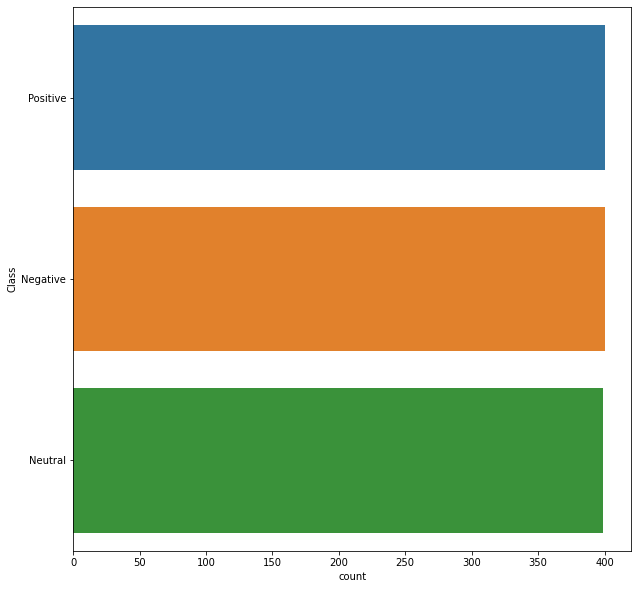

In [ ]:
plt.subplots(figsize = (10,10))
sns.countplot(y='Class', data=df)
plt.show()

# **Data Preperation and Cleaning**

### **Check any Duplicate Sentences**

In [ ]:
df.groupby(['Sentiment', 'Class']).size().reset_index(name='counts').sort_values(['counts'], ascending=False).head(5)

,Sentiment,Class,counts
893,"Very slow to find a ride, happening very often...",Neutral,6
988,otp not receive in smartcell numbers please ma...,Neutral,3
610,Super app it will help us so much in lockdown ...,Positive,3
958,You can never get a ride between 6am and 7am. ...,Negative,3
604,Strongly recommend not relying on the regular ...,Positive,3


# **Remove Duplicate Sentences if any**

In [ ]:
# df=df.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
df.head()

,Sentiment,Class
0,"Nice step in that ""reserve"" is now available f...",Positive
1,The app is good at showing the data user the d...,Positive
2,Been using the app for the past 4+ years with ...,Positive
3,"After a day or two, app sent a notification fo...",Positive
4,The app is very good for price comparison to o...,Positive


In [ ]:
df.shape

(1199, 2)

# **Removing Small Texts**

In [ ]:
df['length'] = df['Sentiment'].apply(lambda x:len(x.split()))

dataset = df.loc[df.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

dataset['no_char'] = df['Sentiment'].apply(lambda cleaned: len(cleaned))

After Cleaning: 
Removed 0 Small conversations 
Total conversations: 1199


# **Lower Casing**

In [ ]:
dataset["Sentiment"] = dataset["Sentiment"].str.lower()
dataset.head()

,Sentiment,Class,length,no_char
0,"nice step in that ""reserve"" is now available f...",Positive,59,332
1,the app is good at showing the data user the d...,Positive,85,463
2,been using the app for the past 4+ years with ...,Positive,85,407
3,"after a day or two, app sent a notification fo...",Positive,98,486
4,the app is very good for price comparison to o...,Positive,91,496


### **Removal of Punctuations**

In [ ]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

dataset["Sentiment"] = dataset["Sentiment"].apply(lambda text: remove_punctuation(text))
dataset.head()

,Sentiment,Class,length,no_char
0,nice step in that reserve is now available for...,Positive,59,332
1,the app is good at showing the data user the d...,Positive,85,463
2,been using the app for the past 4 years with n...,Positive,85,407
3,after a day or two app sent a notification for...,Positive,98,486
4,the app is very good for price comparison to o...,Positive,91,496


### **Removing stopwords**

In [ ]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset['Sentiment']=dataset['Sentiment'].apply(process_text)

In [ ]:
dataset.head()

,Sentiment,Class,length,no_char
0,nice step reserve available ride types however...,Positive,59,332
1,app good showing data user direction driver ho...,Positive,85,463
2,using app past 4 years issues last update wors...,Positive,85,407
3,day two app sent notification hefty discount o...,Positive,98,486
4,app good price comparison firms provide somewh...,Positive,91,496


# **stemming**

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

df['Sentiment']=df['Sentiment'].apply(stemming)  

In [ ]:
dataset.head()

,Sentiment,Class,length,no_char
0,nice step reserve available ride types however...,Positive,59,332
1,app good showing data user direction driver ho...,Positive,85,463
2,using app past 4 years issues last update wors...,Positive,85,407
3,day two app sent notification hefty discount o...,Positive,98,486
4,app good price comparison firms provide somewh...,Positive,91,496


In [ ]:
dataset.loc[98]

Sentiment    selected pet friendly driver took quite time l...
Class                                                 Positive
length                                                      42
no_char                                                    212
Name: 98, dtype: object

### **Seperate Row as Category Wise**

In [ ]:
mask = df['Class'] == "Positive"
Pos = df[mask]
mask = df['Class']  == "Negative"
Neg = df[mask]
mask = df['Class'] == "Neutral"
Neu = df[mask]

### **Show WordCloud Based on Positive Comments**

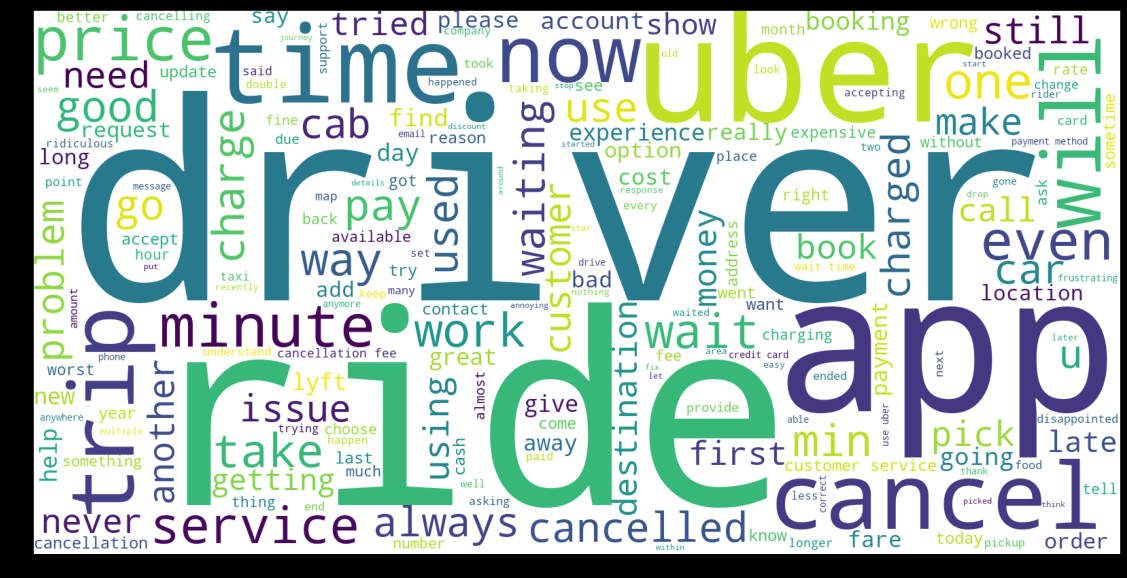

In [ ]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(Pos['Sentiment'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

### **Show WordCloud Based on Negative Comments**

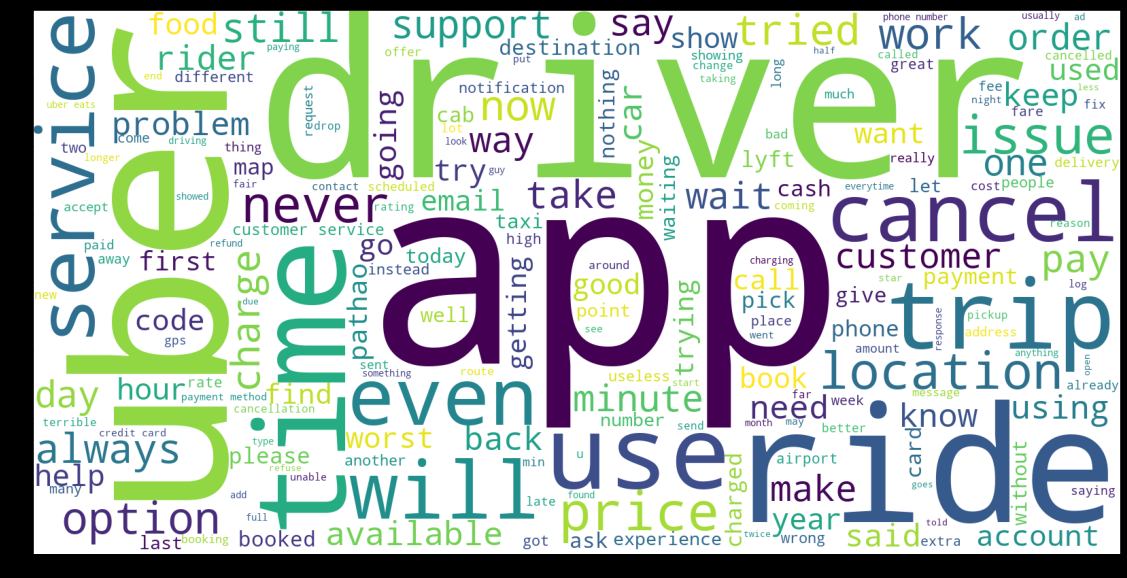

In [ ]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(Neg['Sentiment'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

### **Show WordCloud Based on Neutral Comments**

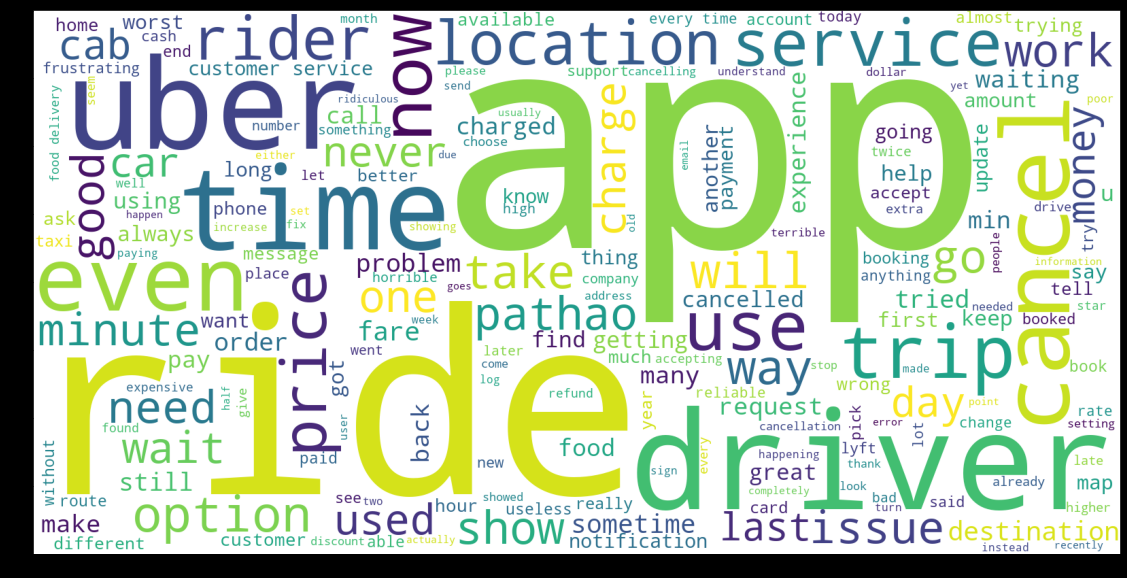

In [ ]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(Neu['Sentiment'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [ ]:
dataset.head()  

,Sentiment,Class,length,no_char
0,nice step reserve available ride types however...,Positive,59,332
1,app good showing data user direction driver ho...,Positive,85,463
2,using app past 4 years issues last update wors...,Positive,85,407
3,day two app sent notification hefty discount o...,Positive,98,486
4,app good price comparison firms provide somewh...,Positive,91,496


# **Unigram Distribution**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
x = ["The fares are way more expensive than before. I thought it was a one-off incident but after today I'm deleting this app."]

In [ ]:
def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

get_top_n_words(x,3)

[('the', 1), ('fares', 1), ('are', 1)]

In [ ]:
unigram_words = get_top_n_words(dataset['Sentiment'],20)
unigram_words

[('app', 901),
 ('ride', 709),
 ('uber', 680),
 ('drivers', 427),
 ('driver', 396),
 ('time', 372),
 ('get', 340),
 ('cancel', 269),
 ('even', 245),
 ('service', 241),
 ('use', 235),
 ('dont', 226),
 ('trip', 218),
 ('minutes', 177),
 ('cant', 169),
 ('price', 159),
 ('times', 158),
 ('wait', 157),
 ('location', 153),
 ('like', 153)]

# **Bigram Distribution**

In [ ]:
y = ["The fares are way more expensive than before. I thought it was a one-off incident but after today I'm deleting this app."]

In [ ]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(y,3)

[('the fares', 1), ('fares are', 1), ('are way', 1)]

In [ ]:
bigram_words = get_top_n_words(dataset['Sentiment'],20)
bigram_words

[('customer service', 69),
 ('cancel ride', 63),
 ('get ride', 47),
 ('use app', 36),
 ('uber app', 34),
 ('every time', 32),
 ('use uber', 31),
 ('30 minutes', 31),
 ('drivers cancel', 30),
 ('cancel trip', 30),
 ('credit card', 28),
 ('dont know', 27),
 ('app doesnt', 26),
 ('using uber', 25),
 ('used uber', 25),
 ('payment method', 25),
 ('book ride', 25),
 ('wait time', 24),
 ('phone number', 23),
 ('even though', 22)]

# **Tigram Distribution**

In [ ]:
z = ["The fares are way more expensive than before. I thought it was a one-off incident but after today I'm deleting this app."]

In [ ]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(z,3)

[('the fares are', 1), ('fares are way', 1), ('are way more', 1)]

In [ ]:
trigram_words = get_top_n_words(dataset['Sentiment'],20)
trigram_words

[('every single time', 10),
 ('something went wrong', 10),
 ('app doesnt work', 9),
 ('drivers cancel trip', 8),
 ('every time try', 6),
 ('never use uber', 6),
 ('dont even bother', 6),
 ('worst app ever', 6),
 ('please fix issue', 6),
 ('never get ride', 6),
 ('slow find ride', 6),
 ('find ride happening', 6),
 ('ride happening often', 6),
 ('happening often lately', 6),
 ('often lately therefore', 6),
 ('lately therefore reliable', 6),
 ('cancelled last minute', 5),
 ('uber gift card', 5),
 ('help section app', 5),
 ('im going pay', 5)]

In [ ]:
dataset.head()

,Sentiment,Class,length,no_char
0,nice step reserve available ride types however...,Positive,59,332
1,app good showing data user direction driver ho...,Positive,85,463
2,using app past 4 years issues last update wors...,Positive,85,407
3,day two app sent notification hefty discount o...,Positive,98,486
4,app good price comparison firms provide somewh...,Positive,91,496


In [ ]:
dataset.reset_index(inplace = True, drop = True)

# **Datset Summary**

In [ ]:
def data_summary(dataset):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.Sentiment) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Class.value_counts().to_dict().items()]

    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Class==label].Sentiment) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.Class==label].Sentiment)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Class==label].Sentiment))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label
documents,words,u_words,class_names = data_summary(df)


Class Name :  Positive
Number of Documents:400
Number of Words:23992
Number of Unique Words:3154
Most Frequent Words:

the	1123
to	846
i	618
and	574
a	554
for	384
is	356
it	322
you	271
of	237

Class Name :  Negative
Number of Documents:400
Number of Words:20672
Number of Unique Words:3247
Most Frequent Words:

the	882
to	723
i	567
and	546
a	496
is	281
for	275
it	254
app	225
my	220

Class Name :  Neutral
Number of Documents:399
Number of Words:21246
Number of Unique Words:3316
Most Frequent Words:

the	979
to	750
i	568
and	502
a	471
is	344
for	313
app	270
it	265
of	251
Total Number of Unique Words:6176


# New Dataframe for Data Summary

In [ ]:
data_matrix = pd.DataFrame({'Total Sentence':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
new_df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
print(new_df)

  Class Names        Category  Values
0    Positive  Total Sentence     400
1    Negative  Total Sentence     400
2     Neutral  Total Sentence     399
3    Positive     Total Words   23992
4    Negative     Total Words   20672
5     Neutral     Total Words   21246
6    Positive    Unique Words    3154
7    Negative    Unique Words    3247
8     Neutral    Unique Words    3316


In [ ]:
new_df

,Class Names,Category,Values
0,Positive,Total Sentence,400
1,Negative,Total Sentence,400
2,Neutral,Total Sentence,399
3,Positive,Total Words,23992
4,Negative,Total Words,20672
5,Neutral,Total Words,21246
6,Positive,Unique Words,3154
7,Negative,Unique Words,3247
8,Neutral,Unique Words,3316


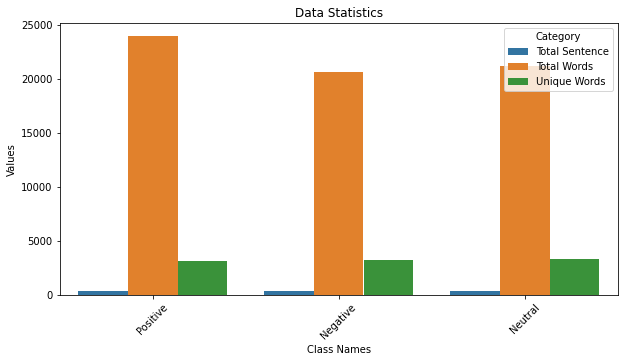

In [ ]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()

sns.barplot(data=new_df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

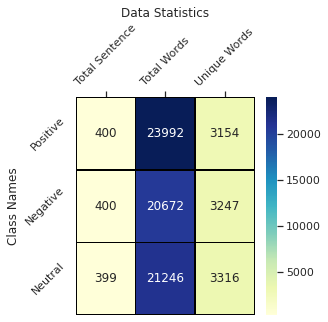

In [ ]:
sns.set()
plt.figure(figsize =(4, 4))
ax = plt.subplot()
sns.heatmap(data_matrix.iloc[:,0:3], annot=True,fmt="d", linewidths=0.5,linecolor = 'Black',cmap = "YlGnBu",ax = ax)

ax.set_ylabel('Class Names') 
ax.set_title('Data Statistics')
y_label = ["Total Sentence", "Total Words", "Unique Words"] 
ax.xaxis.set_ticklabels(y_label, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
ax.xaxis.tick_top()

In [ ]:
sample_data=[10,600]

In [ ]:
dataset.head()

,Sentiment,Class,length,no_char
0,nice step reserve available ride types however...,Positive,59,332
1,app good showing data user direction driver ho...,Positive,85,463
2,using app past 4 years issues last update wors...,Positive,85,407
3,day two app sent notification hefty discount o...,Positive,98,486
4,app good price comparison firms provide somewh...,Positive,91,496


In [ ]:
dataset=dataset.drop(["length","no_char"],axis=1)

In [ ]:
def label_encoding(sentiment,bool):
  
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels)
    class_names =le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

In [ ]:
def dataset_split(feature_space,sentiment):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =7)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [ ]:
def calc_gram_tfidf(Conversations):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(Conversations)
    
    return tfidf,X

In [ ]:
def ml_models_defination(): 
    
    lr_model = LogisticRegression()
    dt_model = DecisionTreeClassifier()
    rf_model = RandomForestClassifier()
    knn_model = KNeighborsClassifier(n_neighbors=24)
    svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
    sgd_model = SGDClassifier(loss = 'log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','KNN','SVM','sgd']
  
    ml_models = [lr_model,dt_model,rf_model,knn_model,svm_model,sgd_model]

    return ml_models,model_names 

In [ ]:
def model_performace(model,X_train,X_test,y_train,y_test):
    
    my_dict = {}
    model.fit(X_train,y_train)
 
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y,pos_label = 'positive', average = 'micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,pos_label = 'positive', average = 'micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y, average = 'micro'),4)*100
    return my_dict 

In [ ]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])
        
    model_names = ['Logistic Regression','Decision Tree','Random Forest','KNN','SVM','SGD']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,'Model Name':model_names })
    return performance_df

In [ ]:
import json

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]


for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.Sentiment)
    labels = label_encoding(dataset.Class,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}

    with open(f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy,f)

Feature Size :======> 49640

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1199 
	Training		 1079 
	Test			 120


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single posit

Feature Size :======> 49640

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1199 
	Training		 1079 
	Test			 120


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single posit

Feature Size :======> 49640

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1199 
	Training		 1079 
	Test			 120


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single posit

In [ ]:
table = performance_table(accuracy)
df3 =pd.DataFrame(table)
table

,Accuracy,Precision,Recall,F1 Score,Model Name
0,57.50,57.50,57.50,57.50,Logistic Regression
1,56.67,56.67,56.67,56.67,Decision Tree
2,57.50,57.50,57.50,57.50,Random Forest
3,46.67,46.67,46.67,46.67,KNN
4,58.33,58.33,58.33,58.33,SVM
5,60.00,60.00,60.00,60.00,SGD


In [ ]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by 5 at = 60.0
Highest F1-Score achieved by 5 at = 60.0
Highest Precision Score achieved by 5 at = 60.0
Highest Recall Score achieved by 5 at = 60.0


In [ ]:
svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
svm_model.fit(X_train, y_train)
svm_model.score(X_test,y_test)

0.5833333333333334

In [ ]:
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)

[[24  8  9]
 [11 23  5]
 [ 7 10 23]]
              precision    recall  f1-score   support

           0       0.57      0.59      0.58        41
           1       0.56      0.59      0.57        39
           2       0.62      0.57      0.60        40

    accuracy                           0.58       120
   macro avg       0.58      0.58      0.58       120
weighted avg       0.58      0.58      0.58       120



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
categories  = ['Negative','Positive',"Neutral"]
group_names = ['True Negative','False Positive', 'False Negative','True Postive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

In [ ]:
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

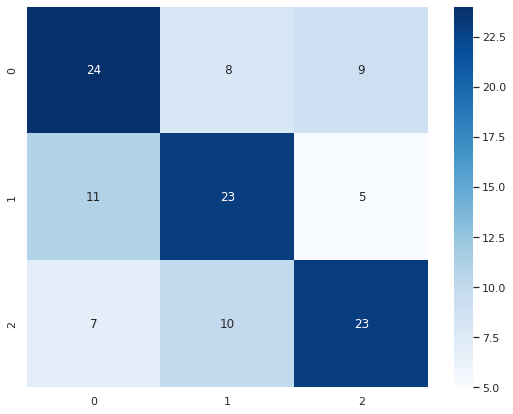

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(cf_matrix,cmap='Blues', annot=True,fmt='d')

In [ ]:
import pickle
file = open('cs_svm.pkl', 'wb')
pickle.dump(svm_model, file)

In [ ]:
model = open('cs_svm.pkl','rb')
svm_model = pickle.load(model)
Comment = "it is very good"
processed_conversation = process_text(Comment)
if (len(processed_conversation))>0:
    cv,feature_vector = calc_gram_tfidf(dataset.Sentiment) 
    feature = cv.transform([processed_conversation]).toarray()
    Result = svm_model.predict(feature)
    if (Result == 0):
        print(f"Negative")
    else:
        print(f"Positive")
else:
    print("This conversation doesn't contains any bengali Words")

Positive
